# LOADING IN TEXT FILE

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(keras.__version__)

1.19.2
1.1.3
2.3.0
2.4.0


In [2]:
d_shuffle = pd.read_csv('C:\\Users\\mqian\\Documents\\senior schoolwork\\syslab\\data-3.txt',sep=',', header=0)
print(d_shuffle.shape)

(322010, 20)


Now we have balanced datasets, with each set having 171866 instances

In [3]:
y = d_shuffle[['Survival months']]
x = d_shuffle.drop(columns='Survival months')
print(y.shape, x.shape)

(322010, 1) (322010, 19)


In [4]:
yy_neg_1 = pd.DataFrame(y.to_numpy(), columns=['Survival months'])

In [45]:
yy_0 = pd.DataFrame(y.to_numpy(), columns=['Survival months'])

In [46]:
yy_0[yy_0['Survival months'] == -1] = 0 #did not survive
print(yy_0)

        Survival months
0                     1
1                     0
2                     0
3                     0
4                     1
...                 ...
322005                1
322006                0
322007                0
322008                1
322009                1

[322010 rows x 1 columns]


Because the activation/loss functions are different for the two models...?

In [47]:
#make the X and y numpy arrays
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [48]:
print(y_train.value_counts())
print(y_test.value_counts())

Survival months
0                  128839
1                  128769
dtype: int64
Survival months
1                  32236
0                  32166
dtype: int64


In [49]:
y_test_0 = pd.DataFrame(y_test.to_numpy(), columns=['Survival months'])
y_train_0 = pd.DataFrame(y_train.to_numpy(), columns=['Survival months'])

y_test_0[y_test_0['Survival months'] == -1] = 0 #did not survive
y_train_0[y_train_0['Survival months'] == -1] = 0 #did not survive

In [50]:
y_test_1 = pd.DataFrame(y_test.to_numpy(), columns=['Survival months'])
y_train_1 = pd.DataFrame(y_train.to_numpy(), columns=['Survival months'])

y_test_1[y_test_0['Survival months'] == 0] = -1 #did not survive
y_train_1[y_train_0['Survival months'] == 0] = -1 #did not survive

In [51]:
y_test_1

,Survival months
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
64397,-1
64398,1
64399,1
64400,1


In [ ]:
#v2

In [5]:
train = pd.read_csv('data-4-train.txt',sep=',', header=0)
print(train.shape)
test = pd.read_csv('data-4-test.txt',sep=',', header=0)
print(test.shape)

(257608, 20)
(64402, 20)


In [6]:
y_train = train[['19']]
X_train = train.drop(columns='19')
print(y_train.shape, X_train.shape)

y_test = test[['19']]
X_test = test.drop(columns='19')
print(y_test.shape, X_test.shape)

(257608, 1) (257608, 19)
(64402, 1) (64402, 19)


In [7]:
y_test_1 = pd.DataFrame(y_test.to_numpy(), columns=['Survival months'])

In [8]:
y_train_1 = pd.DataFrame(y_train.to_numpy(), columns=['Survival months'])

In [9]:
y_test_0 = pd.DataFrame(y_test.to_numpy(), columns=['Survival months'])
y_train_0 = pd.DataFrame(y_train.to_numpy(), columns=['Survival months'])

y_test_0[y_test_1['Survival months'] == -1] = 0 #did not survive
y_train_0[y_train_1['Survival months'] == -1] = 0 #did not survive

In [10]:
import pickle
import matplotlib.pyplot as plt

In [13]:
import matplotlib
matplotlib.__version__

'3.3.2'

In [14]:
import sklearn
sklearn.__version__

'0.23.2'

In [11]:
def savepickle(path, folder, filename, history):
    with open (path+folder+'/'+filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
        
# def readpickle(fname):
#     pickle_file = open(fname)
#     metrics_dict = pickle.load(pickle_file)
#     return metrics_dict

def plotdata(path, folder, filename, H):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(path+folder+'/'+filename+".png")
    plt.show()
    print('done with plot')

In [94]:
from tensorflow import keras
epochs = 50
batch_size = 128
path = 'C:\\Users\\mqian\\Documents\\senior schoolwork\\syslab\\model\\'

# 1Cycle Learning

### 1Cycle scheduling

In [13]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

504/504 [==============================] - 2s 4ms/step - loss: 0.9962 - accuracy: 0.2535


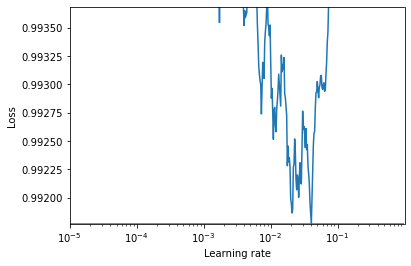

In [30]:
batch_size = 128
rates, losses = find_learning_rate(model, X_test, y_test_0, epochs=1, max_rate = 1, batch_size=128)
plot_lr_vs_loss(rates, losses)

In [14]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [146]:
#get max_rate from the plot in find_learning_rate in the above function
onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.001)

## Exponential Decay LR

```lr = lr0 * 0.1**(epoch / s)```
Reduce the learning rate factor of 10 every s steps

In [59]:
#from geron textbook for exponential 
from tensorflow.keras.callbacks import LearningRateScheduler

steps = 20 
initial_lr = 0.01

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=initial_lr, s=steps)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
#include in callbacks

# Model 1: Reg

In [16]:
folder = 'model_5\\'
num = '5'

In [65]:
from tensorflow.keras.regularizers import l2

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[19]),
    keras.layers.Dense(200, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(.2),
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(150, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(.2),
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(.2),
    keras.layers.experimental.RandomFourierFeatures(output_dim=50, kernel_initializer='gaussian'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [66]:
keras.layers.experimental.RandomFourierFeatures

tensorflow.python.keras.layers.kernelized.RandomFourierFeatures

In [67]:
tf.__version__

'2.3.0'

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 19)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               4000      
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_13 (Dense)             (None, 150)               30150     
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 150)              

In [69]:
model.compile(loss='hinge',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

## Tensorboard

In [18]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "Survivability-200-150-100-D-BN-He-newest-{0}-{1}".format(time.time(), num)
tensorboard = TensorBoard(log_dir="{0}\\logs\\{1}".format(path, NAME))

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(path+folder+'best_try_'+num+'_1.h5', monitor="val_loss", save_best_only=True, verbose=1)
callbacks = [checkpoint, onecycle, tensorboard]
#callbacks = [checkpoint, onecycle]
#callbacks = [checkpoint, lr_scheduler]


#figPath = os.path.sep.join(["monitor", plotnum+"_{}.png".format(os.getpid())])
#jsonPath = os.path.sep.join(["monitor", plotnum+"_{}.json".format(os.getpid())])
#callbacks = [ LearningRateScheduler(lr),checkpoint, TrainingMonitor(figPath, jsonPath=jsonPath)]

In [72]:
#traning further
#model = keras.models.load_model('/cluster/2021mqian/snr research/recurrence_my_project/trial_2/'+'model_15'+'/best_try_'+'15'+'_1.h5')

In [73]:
history = model.fit(X_train, y_train_0, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_0), callbacks = callbacks)

Epoch 1/50
2009/2013 [============================>.] - ETA: 0s - loss: 0.9685 - accuracy: 0.2759
Epoch 00001: val_loss improved from inf to 0.93491, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_5\best_try_5_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9685 - accuracy: 0.2760 - val_loss: 0.9349 - val_accuracy: 0.3292
Epoch 2/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9426 - accuracy: 0.3008
Epoch 00002: val_loss improved from 0.93491 to 0.93075, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_5\best_try_5_1.h5
2013/2013 [==============================] - 11s 5ms/step - loss: 0.9427 - accuracy: 0.3008 - val_loss: 0.9307 - val_accuracy: 0.3163
Epoch 3/50
2007/2013 [============================>.] - ETA: 0s - loss: 0.9364 - accuracy: 0.2952
Epoch 00003: val_loss improved from 0.93075 to 0.93050, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_5\be

In [35]:
savepickle(path, folder, 'history_'+num+'_1', history)

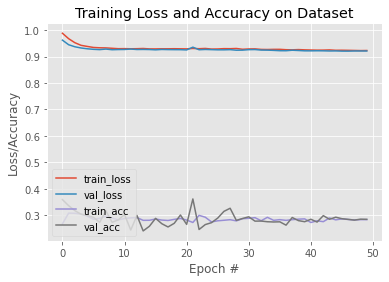

done with plot


In [36]:
plotdata(path, folder, 'plot_'+num+'_1', history)

In [37]:
model.save_weights(path+folder+'try_'+num+'_1.h5')

In [38]:
model.load_weights('C:\\Users\\mqian\\Documents\\senior schoolwork\\syslab\\model\\'+folder+'best_try_'+num+'_1.h5')

In [38]:
#For some reason, says Unknown layer: RandomFourierFeatures? But I used the same tensorflow version... 
#new_model = keras.models.load_model('C:\\Users\\mqian\\Documents\\senior schoolwork\\syslab\\'+folder+'best_try_'+num+'_1.h5')

ValueError: Unknown layer: RandomFourierFeatures

In [39]:
loss, acc = model.evaluate(X_test, y_test_0)

2013/2013 [==============================] - 2s 854us/step - loss: 0.9206 - accuracy: 0.2843


## Cross Validation and Grid Search

In [ ]:
from sklearn.model_selection import StratifiedKFold
#save the model in each training
#loop through the grid search parameters or use gridsearch cv
#ok i think i will just do grid search without the CV ??? but gridsearch does use cross validation automatically 
lr = []
regularization=[]
KerasClassifier(callbacks - )
grd=GridSearchCV
#STEPS TO DO 
#1. REDO THE SCALING FOR MINMAX FOR TESTING AND TRAINING SETS *DONE* 
#1.5 SCALE DOWN THE NUMBER OF DATA THAT YOU ARE USING TO SPEED UP TRAINING (didn't do)
#2. USE CROSS VALIDATION FOR THE MODEL SELECTION THAT REQUIRES CHANGES IN THE DATA (aka 2 end nodes) - (doing in next section)
#3. USE CROSS VALIDATION ON THE GRID SEARCH (tried to do with dropout - I DID IN THIS SECTION)
#4. FINE TUNE FROM THERE OR WRITE A CROSS VALIDATION USING UR OWN CODE CAUSE ITS JUST FOR LOOPS (going to code it later after school lulw)

In [61]:
folder = 'model_36_norm\\'
num = '36'

from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "Survivability-200-150-100-D-BN-He-{0}-{1}".format(time.time(), num)
tensorboard = TensorBoard(log_dir="{0}\\logs\\{1}".format(path, NAME))

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(path+folder+'best_try_'+num+'_1.h5', monitor="accuracy", save_best_only=True, verbose=1)
callbacks = [checkpoint, onecycle, tensorboard]

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def create_model(dropout_rate=0.0): #model 35/29 same thing
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[19]),
        keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation="sigmoid")
        ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [64]:
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0) 

In [65]:
from sklearn.model_selection import GridSearchCV

call = {'callbacks':callbacks}

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=1, cv=3, scoring='accuracy')
grid_result=grid.fit(X_train, y_train_0, **call)


Epoch 00001: accuracy improved from -inf to 0.55202, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00002: accuracy improved from 0.55202 to 0.56479, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00003: accuracy improved from 0.56479 to 0.56959, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00004: accuracy improved from 0.56959 to 0.57247, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00005: accuracy improved from 0.57247 to 0.57482, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00006: accuracy improved from 0.57482 to 0.57570, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_36_norm\best_try_36_1.h5

Epoch 00007: accuracy did not improve from


Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041: accuracy did not improve from 0.60351

Epoch 00042: accuracy did not improve from 0.60351

Epoch 00043: accuracy did not improve from 0.60351

Epoch 00044: accuracy did not improve from 0.60351

Epoch 00045: accuracy did not improve from 0.60351

Epoch 00046: accuracy did not improve from 0.60351

Epoch 00047: accuracy did not improve from 0.60351

Epoch 00048: accuracy did not improve from 0.60351

Epoch 00049: accuracy did not improve from 0.60351

Epoch 00050: accuracy did not improve from 0.60351

Epoch 00001


Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041: accuracy did not improve from 0.60351

Epoch 00042: accuracy did not improve from 0.60351

Epoch 00043: accuracy did not improve from 0.60351

Epoch 00044: accuracy did not improve from 0.60351

Epoch 00045: accuracy did not improve from 0.60351

Epoch 00046: accuracy did not improve from 0.60351

Epoch 00047: accuracy did not improve from 0.60351

Epoch 00048: accuracy did not improve from 0.60351

Epoch 00049


Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041: accuracy did not improve from 0.60351

Epoch 00042: accuracy did not improve from 0.60351

Epoch 00043: accuracy did not improve from 0.60351

Epoch 00044: accuracy did not improve from 0.60351

Epoch 00045: accuracy did not improve from 0.60351

Epoch 00046: accuracy did not improve from 0.60351

Epoch 00047


Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041: accuracy did not improve from 0.60351

Epoch 00042: accuracy did not improve from 0.60351

Epoch 00043: accuracy did not improve from 0.60351

Epoch 00044: accuracy did not improve from 0.60351

Epoch 00045


Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041: accuracy did not improve from 0.60351

Epoch 00042: accuracy did not improve from 0.60351

Epoch 00043


Epoch 00022: accuracy did not improve from 0.60351

Epoch 00023: accuracy did not improve from 0.60351

Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039: accuracy did not improve from 0.60351

Epoch 00040: accuracy did not improve from 0.60351

Epoch 00041


Epoch 00020: accuracy did not improve from 0.60351

Epoch 00021: accuracy did not improve from 0.60351

Epoch 00022: accuracy did not improve from 0.60351

Epoch 00023: accuracy did not improve from 0.60351

Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037: accuracy did not improve from 0.60351

Epoch 00038: accuracy did not improve from 0.60351

Epoch 00039


Epoch 00018: accuracy did not improve from 0.60351

Epoch 00019: accuracy did not improve from 0.60351

Epoch 00020: accuracy did not improve from 0.60351

Epoch 00021: accuracy did not improve from 0.60351

Epoch 00022: accuracy did not improve from 0.60351

Epoch 00023: accuracy did not improve from 0.60351

Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035: accuracy did not improve from 0.60351

Epoch 00036: accuracy did not improve from 0.60351

Epoch 00037


Epoch 00016: accuracy did not improve from 0.60351

Epoch 00017: accuracy did not improve from 0.60351

Epoch 00018: accuracy did not improve from 0.60351

Epoch 00019: accuracy did not improve from 0.60351

Epoch 00020: accuracy did not improve from 0.60351

Epoch 00021: accuracy did not improve from 0.60351

Epoch 00022: accuracy did not improve from 0.60351

Epoch 00023: accuracy did not improve from 0.60351

Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033: accuracy did not improve from 0.60351

Epoch 00034: accuracy did not improve from 0.60351

Epoch 00035


Epoch 00014: accuracy did not improve from 0.60351

Epoch 00015: accuracy did not improve from 0.60351

Epoch 00016: accuracy did not improve from 0.60351

Epoch 00017: accuracy did not improve from 0.60351

Epoch 00018: accuracy did not improve from 0.60351

Epoch 00019: accuracy did not improve from 0.60351

Epoch 00020: accuracy did not improve from 0.60351

Epoch 00021: accuracy did not improve from 0.60351

Epoch 00022: accuracy did not improve from 0.60351

Epoch 00023: accuracy did not improve from 0.60351

Epoch 00024: accuracy did not improve from 0.60351

Epoch 00025: accuracy did not improve from 0.60351

Epoch 00026: accuracy did not improve from 0.60351

Epoch 00027: accuracy did not improve from 0.60351

Epoch 00028: accuracy did not improve from 0.60351

Epoch 00029: accuracy did not improve from 0.60351

Epoch 00030: accuracy did not improve from 0.60351

Epoch 00031: accuracy did not improve from 0.60351

Epoch 00032: accuracy did not improve from 0.60351

Epoch 00033

In [50]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [66]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.557281 using {'dropout_rate': 0.0}
0.557281 (0.021953) with: {'dropout_rate': 0.0}
0.526769 (0.006755) with: {'dropout_rate': 0.1}
0.519770 (0.004419) with: {'dropout_rate': 0.2}
0.522332 (0.003544) with: {'dropout_rate': 0.3}
0.523272 (0.004472) with: {'dropout_rate': 0.4}
0.520469 (0.006463) with: {'dropout_rate': 0.5}
0.516133 (0.007147) with: {'dropout_rate': 0.6}
0.517725 (0.006307) with: {'dropout_rate': 0.7}
0.508241 (0.005404) with: {'dropout_rate': 0.8}
0.501875 (0.003538) with: {'dropout_rate': 0.9}


In [68]:
grid_result.cv_results_

{'mean_fit_time': array([220.97976987, 191.79969645, 192.56027269, 191.46967753,
        191.15229789, 190.56254896, 195.66119432, 189.91678031,
        190.26673905, 189.32322439]),
 'std_fit_time': array([19.84288681,  3.79740669,  2.75849298,  1.45684184,  0.92014618,
         2.53589331, 10.28885864,  0.9920326 ,  0.66685109,  1.41815925]),
 'mean_score_time': array([0.66475813, 0.67857424, 0.51151379, 0.55987461, 0.5749201 ,
        0.53557475, 0.50964491, 0.50394424, 0.51097155, 0.52482931]),
 'std_score_time': array([0.06561047, 0.11502584, 0.01902492, 0.02637318, 0.07053564,
        0.0102225 , 0.00740586, 0.0081498 , 0.02068512, 0.0135767 ]),
 'param_dropout_rate': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'dropout_rate': 0.0},
  {'dropout_rate': 0.1},
  {'dropout_rate': 0.2},

In [80]:
model1 = create_model(0.0)
model1.load_weights('C:\\Users\\mqian\\Documents\\senior schoolwork\\syslab\\model\\'+folder+'best_try_'+num+'_1.h5')

In [82]:
loss, acc = model1.evaluate(X_test, y_test_0)

2013/2013 [==============================] - 2s 873us/step - loss: 0.6992 - accuracy: 0.5639


In [116]:
def savepickle(path, folder, filename, history):
    with open (path+folder+'/'+filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [87]:
savepickle(path, folder, 'history_'+num+'_1', grid_result.cv_results_)

## Manual Cross Val

In [163]:
folder = 'model_10\\'
num = '10'

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time

Epoch 1/50
2001/2013 [============================>.] - ETA: 0s - loss: 0.9976 - accuracy: 0.5060
Epoch 00001: val_loss improved from inf to 0.98519, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.1_1.h5
2013/2013 [==============================] - 11s 6ms/step - loss: 0.9974 - accuracy: 0.5061 - val_loss: 0.9852 - val_accuracy: 0.5410
Epoch 2/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9881 - accuracy: 0.5235
Epoch 00002: val_loss improved from 0.98519 to 0.95906, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.1_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9880 - accuracy: 0.5237 - val_loss: 0.9591 - val_accuracy: 0.5555
Epoch 3/50
2012/2013 [============================>.] - ETA: 0s - loss: 0.9674 - accuracy: 0.5436
Epoch 00003: val_loss improved from 0.95906 to 0.94183, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\mo

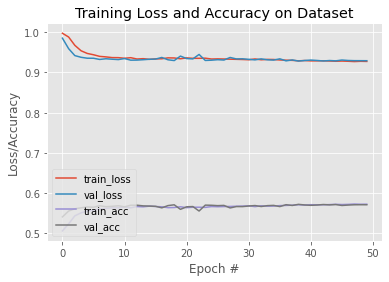

done with plot
Epoch 1/50
2009/2013 [============================>.] - ETA: 0s - loss: 0.9973 - accuracy: 0.5064
Epoch 00001: val_loss improved from inf to 0.98120, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.2_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9973 - accuracy: 0.5064 - val_loss: 0.9812 - val_accuracy: 0.5397
Epoch 2/50
2012/2013 [============================>.] - ETA: 0s - loss: 0.9881 - accuracy: 0.5212
Epoch 00002: val_loss improved from 0.98120 to 0.95817, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.2_1.h5
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9881 - accuracy: 0.5212 - val_loss: 0.9582 - val_accuracy: 0.5502
Epoch 3/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9716 - accuracy: 0.5371 ETA: 2s - loss: 0 - ETA: 1s - loss:
Epoch 00003: val_loss improved from 0.95817 to 0.94635, saving model to C:\Users

Epoch 25/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9352 - accuracy: 0.5649
Epoch 00025: val_loss did not improve from 0.92993
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9352 - accuracy: 0.5649 - val_loss: 0.9318 - val_accuracy: 0.5688
Epoch 26/50
2008/2013 [============================>.] - ETA: 0s - loss: 0.9336 - accuracy: 0.5664
Epoch 00026: val_loss did not improve from 0.92993
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9336 - accuracy: 0.5664 - val_loss: 0.9332 - val_accuracy: 0.5671
Epoch 27/50
2002/2013 [============================>.] - ETA: 0s - loss: 0.9332 - accuracy: 0.5668
Epoch 00027: val_loss did not improve from 0.92993
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9331 - accuracy: 0.5669 - val_loss: 0.9305 - val_accuracy: 0.5697
Epoch 28/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9337 - accuracy: 0.5663
Epoch 00028: val_loss did not improve from 0.9299

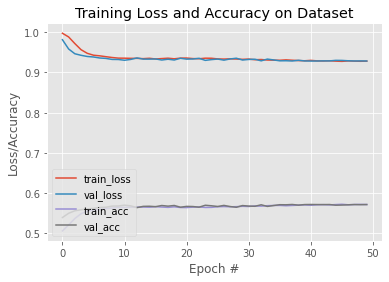

done with plot
Epoch 1/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9965 - accuracy: 0.5081
Epoch 00001: val_loss improved from inf to 0.98271, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.299999999999999_1.h5
2013/2013 [==============================] - 12s 6ms/step - loss: 0.9964 - accuracy: 0.5082 - val_loss: 0.9827 - val_accuracy: 0.5345
Epoch 2/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9859 - accuracy: 0.5242
Epoch 00002: val_loss improved from 0.98271 to 0.95607, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_10\best_try_10.299999999999999_1.h5
2013/2013 [==============================] - 11s 5ms/step - loss: 0.9857 - accuracy: 0.5243 - val_loss: 0.9561 - val_accuracy: 0.5498
Epoch 3/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9673 - accuracy: 0.5409
Epoch 00003: val_loss improved from 0.95607 to 0.94598, saving model to C:\Users\mqian\

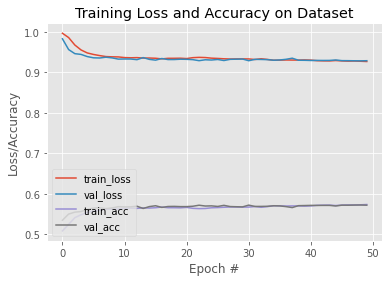

done with plot
57.16% (+/- 0.03%)


In [164]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.regularizers import l2

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

from tensorflow.keras.regularizers import l2

cvscores = []
for train, test in kfold.split(X_train, y_train_0):
    # create model
    num = float(num)
    num = num + 0.1
    num = str(num)
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[19]),
        keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.experimental.RandomFourierFeatures(output_dim=20, kernel_initializer='gaussian'),
        keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(1, activation="sigmoid")
        ])
    
    # Compile model
    model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
   
    # Callbacks
    NAME = "Survivability-200-150-100-D-BN-He-{0}-{1}".format(time.time(), num)
    tensorboard = TensorBoard(log_dir="{0}\\logs\\{1}".format(path, NAME))
    
    onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.001)

    checkpoint = ModelCheckpoint(path+folder+'best_try_'+num+'_1.h5', monitor="val_loss", save_best_only=True, verbose=1)
    callbacks = [checkpoint, onecycle, tensorboard]
    
    # Fit the model
    history = model.fit(X_train, y_train_0, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_test, y_test_0), callbacks = callbacks)
    # evaluate the model
    scores = model.evaluate(X_test, y_test_0, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    savepickle(path, folder, 'history_'+num+'_1', history)
    plotdata(path, folder, 'plot_'+num+'_1', history)
    model.save_weights(path+folder+'try_'+num+'_1.h5')
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [134]:
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()
#     biases = layer.get_weights()[1]
    
#     for toNeuronNum, bias in enumerate(biases):
#         print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
             print(f'L{layerNum}N{fromNeuronNum} \
                   -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

L1N0                    -> L2N0 = [ 0.0024129  -0.26891384 -0.3272048   0.17847182 -0.5136386  -0.15533334
  0.21267177 -0.6981733  -0.1318059  -0.1074567   0.16903602 -0.661726
  0.17290245 -0.0131072  -0.1633152   0.5472914  -0.30002263  0.6514851
  0.0434515  -0.31179175  0.06288417 -0.11375406  0.15358424 -0.05659465
 -0.3223114  -0.24748473  0.25225788  0.12940286 -0.13536827 -0.596138
 -0.07726951  0.18015935  0.03179678 -0.02896026  0.16621312 -0.46248668
 -0.56399304 -0.2671366  -0.21580245  0.2735189  -0.3791918  -0.19699945
 -0.08929579 -0.28869012  0.36448765  0.20909971 -0.02944583  0.04674202
 -0.00200772 -0.11501584 -0.05644314 -0.7147112  -0.5286213  -0.3242565
  0.15268263  0.18428768 -0.04684382  0.28633788 -0.3769945   0.19116572
 -0.5058293   0.46668807  0.5369829  -0.49683553  0.18982165  0.1509458
 -0.30405086  0.3496411  -0.40144017  0.04835745  0.20422906  0.3089448
  0.1824408   0.14018229 -0.18709964 -0.15636513  0.0741924  -0.66805685
 -0.396785    0.041357   

  0.2329446  -0.1395209   0.19070674 -0.04894316  0.00913923 -0.06846374]
L4N0                    -> L5N59 = [-1.55988364e-02 -9.13143009e-02  8.04560035e-02  4.08776373e-01
 -6.67873025e-02  9.86264497e-02  3.28828752e-01 -3.40137654e-03
  3.09049845e-01 -4.74319965e-01 -3.23812783e-01 -1.39358252e-01
  1.84271976e-01  2.41262227e-01  1.64781690e-01  1.18662976e-01
 -6.06865212e-02 -1.35978088e-01  2.06482559e-01 -1.28447143e-02
  1.57063425e-01 -1.00568496e-01  7.22162202e-02 -5.23709729e-02
  4.22989391e-02 -3.35582972e-01 -5.16901851e-01 -3.37678462e-01
  3.34901720e-01  3.43246907e-01 -5.70273519e-01  5.62786311e-02
 -3.85100879e-02 -3.04329246e-01  1.86313912e-01  3.98775727e-01
  3.19731422e-02  6.52042925e-02  2.34024972e-01  1.36438325e-01
  3.39355282e-02  1.51369557e-01 -5.62339164e-02  1.33447304e-01
 -3.47019762e-01 -6.12612009e-01  9.16742757e-02 -1.02844156e-01
  2.31170967e-01 -3.12559217e-01 -7.05057442e-01  5.25161549e-02
  1.20857351e-01  1.27169341e-01 -1.99264288e-

L6N1                    -> L7N98 = -0.13288263976573944
L6N1                    -> L7N99 = 0.05586006119847298
L6N1                    -> L7N100 = 0.3466978073120117
L6N1                    -> L7N101 = 0.12465067952871323
L6N1                    -> L7N102 = 0.0024611512199044228
L6N1                    -> L7N103 = 0.06913211941719055
L6N1                    -> L7N104 = -0.15844027698040009
L6N1                    -> L7N105 = 0.09363208711147308
L6N1                    -> L7N106 = 0.22627604007720947
L6N1                    -> L7N107 = 0.12641803920269012
L6N1                    -> L7N108 = 0.08365409076213837
L6N1                    -> L7N109 = 0.07991782575845718
L6N1                    -> L7N110 = -0.140188530087471
L6N1                    -> L7N111 = 0.19684883952140808
L6N1                    -> L7N112 = -0.049443479627370834
L6N1                    -> L7N113 = 0.13944077491760254
L6N1                    -> L7N114 = 0.6201757192611694
L6N1                    -> L7N115 = 0.331935584

 -0.04313998  0.0311463 ]
L7N0                    -> L8N43 = [ 1.40367672e-01  1.15162665e-02  7.63168046e-03  1.88547924e-01
  1.94799781e-01  1.34798050e-01  8.74677766e-03 -2.32181624e-01
  4.93675051e-03  2.13096291e-01  1.87954783e-01 -9.14969295e-02
  6.23084605e-03 -3.06709521e-02 -1.08632371e-01  8.02671444e-03
 -2.16699362e-01  1.63172230e-01 -2.71713227e-01  4.00958098e-02
 -1.54489785e-01  8.97291768e-03  4.09076698e-02 -3.11393682e-02
  2.64575124e-01  1.95540618e-02  1.23812042e-01  8.25474635e-02
 -1.06718808e-01  4.98216040e-03  1.43687218e-01 -3.02925166e-02
 -2.03178786e-02 -2.02172816e-01 -8.84251378e-04  4.36076671e-02
 -2.53424376e-01 -9.49836746e-02  2.43584126e-01  1.68471914e-02
 -8.84789899e-02  8.87565222e-03  1.53474137e-01  2.71613628e-01
  5.80940917e-02 -5.49997054e-02 -2.24683374e-01  1.44364521e-01
 -1.76557258e-01  5.56222349e-02 -2.69587487e-01  4.31532934e-02
  1.78418979e-01 -1.90787553e-03  1.59677044e-01 -4.84438613e-02
  4.02671359e-02  5.95404441e

  0.04843094  0.01262809]
L7N0                    -> L8N133 = [-1.93273723e-01 -1.68177173e-01 -9.58325714e-02  3.16089094e-02
 -5.61170466e-02  4.65489663e-02 -1.34200022e-01 -1.05850667e-01
  1.85711771e-01  1.40504530e-02  3.83628123e-02 -1.38887599e-01
 -4.80512559e-01  3.37158233e-01  2.00456515e-01 -1.52770579e-01
 -1.04661532e-01 -1.39309436e-01  2.35479679e-02 -7.98109695e-02
 -7.82628283e-02  1.36741214e-02  3.94480452e-02  1.72252610e-01
 -1.03074186e-01  1.38734534e-01 -4.14637588e-02 -1.63544137e-02
  9.25791487e-02  5.63686788e-02 -5.66792078e-02 -1.71011358e-01
  4.66978326e-02 -1.56802416e-01 -8.24335441e-02 -2.87001014e-01
  9.18872952e-02  2.66451798e-02  4.31281142e-02  2.01950982e-01
 -1.18775778e-01 -2.46307682e-02  1.64773017e-01  7.59901330e-02
 -8.80616065e-03 -5.22444546e-01 -2.10604504e-01  2.64396608e-01
 -2.86985338e-01 -2.18217205e-02 -2.70708859e-01  1.80169597e-01
 -2.33576372e-02  9.54234675e-02 -1.12490449e-03  3.28557342e-01
  8.77534002e-02 -1.33621320

## Manual Cross Val 2

In [165]:
folder = 'model_11\\'
num = '11'

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time

Epoch 1/50
2005/2013 [============================>.] - ETA: 0s - loss: 0.9971 - accuracy: 0.5050
Epoch 00001: val_loss improved from inf to 0.98025, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.1_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9971 - accuracy: 0.5049 - val_loss: 0.9803 - val_accuracy: 0.5368
Epoch 2/50
2002/2013 [============================>.] - ETA: 0s - loss: 0.9886 - accuracy: 0.5194
Epoch 00002: val_loss improved from 0.98025 to 0.96107, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.1_1.h5
2013/2013 [==============================] - 11s 5ms/step - loss: 0.9884 - accuracy: 0.5196 - val_loss: 0.9611 - val_accuracy: 0.5469
Epoch 3/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9732 - accuracy: 0.5354
Epoch 00003: val_loss improved from 0.96107 to 0.94803, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\mo

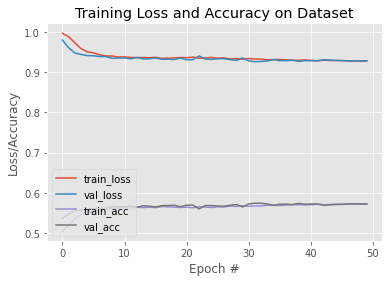

done with plot
Epoch 1/50
2002/2013 [============================>.] - ETA: 0s - loss: 0.9980 - accuracy: 0.5044
Epoch 00001: val_loss improved from inf to 0.98176, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.2_1.h5
2013/2013 [==============================] - 11s 6ms/step - loss: 0.9979 - accuracy: 0.5045 - val_loss: 0.9818 - val_accuracy: 0.5426
Epoch 2/50
2009/2013 [============================>.] - ETA: 0s - loss: 0.9867 - accuracy: 0.5245
Epoch 00002: val_loss improved from 0.98176 to 0.95903, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.2_1.h5
2013/2013 [==============================] - 11s 5ms/step - loss: 0.9867 - accuracy: 0.5245 - val_loss: 0.9590 - val_accuracy: 0.5479
Epoch 3/50
2012/2013 [============================>.] - ETA: 0s - loss: 0.9716 - accuracy: 0.5359
Epoch 00003: val_loss improved from 0.95903 to 0.94873, saving model to C:\Users\mqian\Documents\senior schoolwork\

Epoch 25/50
2008/2013 [============================>.] - ETA: 0s - loss: 0.9367 - accuracy: 0.5636
Epoch 00025: val_loss did not improve from 0.93056
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9366 - accuracy: 0.5636 - val_loss: 0.9386 - val_accuracy: 0.5620
Epoch 26/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9360 - accuracy: 0.5639
Epoch 00026: val_loss did not improve from 0.93056
2013/2013 [==============================] - 9s 5ms/step - loss: 0.9359 - accuracy: 0.5641 - val_loss: 0.9335 - val_accuracy: 0.5671
Epoch 27/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9339 - accuracy: 0.5660
Epoch 00027: val_loss did not improve from 0.93056
2013/2013 [==============================] - 9s 5ms/step - loss: 0.9339 - accuracy: 0.5660 - val_loss: 0.9327 - val_accuracy: 0.5679
Epoch 28/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9335 - accuracy: 0.5666
Epoch 00028: val_loss did not improve from 0.93056


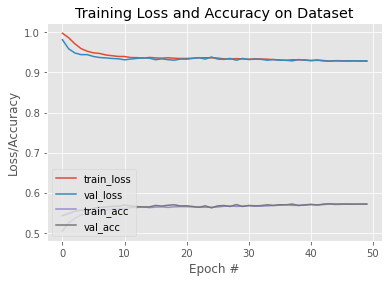

done with plot
Epoch 1/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9978 - accuracy: 0.5033
Epoch 00001: val_loss improved from inf to 0.98294, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.299999999999999_1.h5
2013/2013 [==============================] - 11s 6ms/step - loss: 0.9978 - accuracy: 0.5033 - val_loss: 0.9829 - val_accuracy: 0.5212
Epoch 2/50
2005/2013 [============================>.] - ETA: 0s - loss: 0.9857 - accuracy: 0.5221
Epoch 00002: val_loss improved from 0.98294 to 0.95866, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_11\best_try_11.299999999999999_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9856 - accuracy: 0.5221 - val_loss: 0.9587 - val_accuracy: 0.5460
Epoch 3/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9708 - accuracy: 0.5359
Epoch 00003: val_loss improved from 0.95866 to 0.94734, saving model to C:\Users\mqian\

Epoch 48/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.5709
Epoch 00048: val_loss did not improve from 0.92757
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9292 - accuracy: 0.5709 - val_loss: 0.9278 - val_accuracy: 0.5725
Epoch 49/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9287 - accuracy: 0.5713
Epoch 00049: val_loss did not improve from 0.92757
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9286 - accuracy: 0.5714 - val_loss: 0.9284 - val_accuracy: 0.5717
Epoch 50/50
2001/2013 [============================>.] - ETA: 0s - loss: 0.9285 - accuracy: 0.5716
Epoch 00050: val_loss did not improve from 0.92757
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9285 - accuracy: 0.5716 - val_loss: 0.9282 - val_accuracy: 0.5721
accuracy: 57.21%


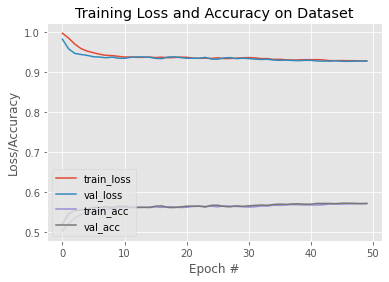

done with plot
57.19% (+/- 0.03%)


In [166]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.regularizers import l2

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

from tensorflow.keras.regularizers import l2

cvscores = []
for train, test in kfold.split(X_train, y_train_0):
    # create model
    num = float(num)
    num = num + 0.1
    num = str(num)
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[19]),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.experimental.RandomFourierFeatures(output_dim=20, kernel_initializer='gaussian'),
        keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(1, activation="sigmoid")
        ])
    
    # Compile model
    model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
   
    # Callbacks
    NAME = "Survivability-200-150-100-D-BN-He-{0}-{1}".format(time.time(), num)
    tensorboard = TensorBoard(log_dir="{0}\\logs\\{1}".format(path, NAME))
    
    onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.001)

    checkpoint = ModelCheckpoint(path+folder+'best_try_'+num+'_1.h5', monitor="val_loss", save_best_only=True, verbose=1)
    callbacks = [checkpoint, onecycle, tensorboard]
    
    # Fit the model
    history = model.fit(X_train, y_train_0, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_test, y_test_0), callbacks = callbacks)
    # evaluate the model
    scores = model.evaluate(X_test, y_test_0, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    savepickle(path, folder, 'history_'+num+'_1', history)
    plotdata(path, folder, 'plot_'+num+'_1', history)
    model.save_weights(path+folder+'try_'+num+'_1.h5')
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

## Manual Cross Val 3

In [160]:
folder = 'model_9\\'
num = '9'

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time

Epoch 1/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9950 - accuracy: 0.5079
Epoch 00001: val_loss improved from inf to 0.96526, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.1_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9949 - accuracy: 0.5079 - val_loss: 0.9653 - val_accuracy: 0.5470
Epoch 2/50
2008/2013 [============================>.] - ETA: 0s - loss: 0.9786 - accuracy: 0.5308
Epoch 00002: val_loss improved from 0.96526 to 0.95159, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.1_1.h5
2013/2013 [==============================] - 9s 4ms/step - loss: 0.9785 - accuracy: 0.5308 - val_loss: 0.9516 - val_accuracy: 0.5535
Epoch 3/50
2005/2013 [============================>.] - ETA: 0s - loss: 0.9655 - accuracy: 0.5424
Epoch 00003: val_loss improved from 0.95159 to 0.94514, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9

Epoch 25/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9327 - accuracy: 0.5674
Epoch 00025: val_loss did not improve from 0.92955
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9326 - accuracy: 0.5675 - val_loss: 0.9310 - val_accuracy: 0.5693
Epoch 26/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9318 - accuracy: 0.5683
Epoch 00026: val_loss did not improve from 0.92955
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9317 - accuracy: 0.5684 - val_loss: 0.9307 - val_accuracy: 0.5695
Epoch 27/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9330 - accuracy: 0.5671
Epoch 00027: val_loss improved from 0.92955 to 0.92772, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.1_1.h5
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9329 - accuracy: 0.5671 - val_loss: 0.9277 - val_accuracy: 0.5729
Epoch 28/50
2009/2013 [=========================

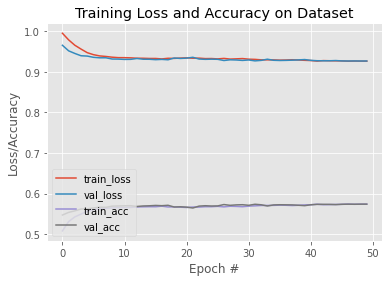

done with plot
Epoch 1/50
2003/2013 [============================>.] - ETA: 0s - loss: 0.9963 - accuracy: 0.5088
Epoch 00001: val_loss improved from inf to 0.97948, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.2_1.h5
2013/2013 [==============================] - 9s 5ms/step - loss: 0.9962 - accuracy: 0.5089 - val_loss: 0.9795 - val_accuracy: 0.5339
Epoch 2/50
2001/2013 [============================>.] - ETA: 0s - loss: 0.9872 - accuracy: 0.5233
Epoch 00002: val_loss improved from 0.97948 to 0.96294, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.2_1.h5
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9870 - accuracy: 0.5234 - val_loss: 0.9629 - val_accuracy: 0.5438
Epoch 3/50
2001/2013 [============================>.] - ETA: 0s - loss: 0.9738 - accuracy: 0.5368
Epoch 00003: val_loss improved from 0.96294 to 0.95187, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab

2011/2013 [============================>.] - ETA: 0s - loss: 0.9332 - accuracy: 0.5669
Epoch 00025: val_loss did not improve from 0.92954
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9332 - accuracy: 0.5669 - val_loss: 0.9318 - val_accuracy: 0.5687
Epoch 26/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9330 - accuracy: 0.5671
Epoch 00026: val_loss did not improve from 0.92954
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9330 - accuracy: 0.5671 - val_loss: 0.9321 - val_accuracy: 0.5682
Epoch 27/50
2007/2013 [============================>.] - ETA: 0s - loss: 0.9317 - accuracy: 0.5685
Epoch 00027: val_loss improved from 0.92954 to 0.92944, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.2_1.h5
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9317 - accuracy: 0.5685 - val_loss: 0.9294 - val_accuracy: 0.5710
Epoch 28/50
2001/2013 [============================>.] - ETA

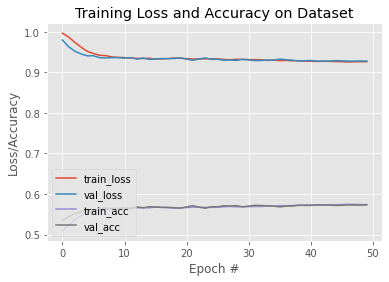

done with plot
Epoch 1/50
2008/2013 [============================>.] - ETA: 0s - loss: 0.9950 - accuracy: 0.5081
Epoch 00001: val_loss improved from inf to 0.98287, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.299999999999999_1.h5
2013/2013 [==============================] - 10s 5ms/step - loss: 0.9949 - accuracy: 0.5081 - val_loss: 0.9829 - val_accuracy: 0.5172
Epoch 2/50
2011/2013 [============================>.] - ETA: 0s - loss: 0.9827 - accuracy: 0.5249
Epoch 00002: val_loss improved from 0.98287 to 0.95854, saving model to C:\Users\mqian\Documents\senior schoolwork\syslab\model\model_9\best_try_9.299999999999999_1.h5
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9827 - accuracy: 0.5249 - val_loss: 0.9585 - val_accuracy: 0.5463
Epoch 3/50
2004/2013 [============================>.] - ETA: 0s - loss: 0.9688 - accuracy: 0.5388 ETA: 
Epoch 00003: val_loss improved from 0.95854 to 0.94874, saving model to C:\Users\mqian

Epoch 25/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9347 - accuracy: 0.5654
Epoch 00025: val_loss did not improve from 0.93280
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9347 - accuracy: 0.5654 - val_loss: 0.9371 - val_accuracy: 0.5635
Epoch 26/50
2010/2013 [============================>.] - ETA: 0s - loss: 0.9347 - accuracy: 0.5653
Epoch 00026: val_loss did not improve from 0.93280
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9347 - accuracy: 0.5653 - val_loss: 0.9376 - val_accuracy: 0.5626
Epoch 27/50
2006/2013 [============================>.] - ETA: 0s - loss: 0.9340 - accuracy: 0.5660
Epoch 00027: val_loss did not improve from 0.93280
2013/2013 [==============================] - 8s 4ms/step - loss: 0.9340 - accuracy: 0.5660 - val_loss: 0.9341 - val_accuracy: 0.5662
Epoch 28/50
2013/2013 [==============================] - ETA: 0s - loss: 0.9328 - accuracy: 0.5678
Epoch 00028: val_loss did not improve from 0.93280
2

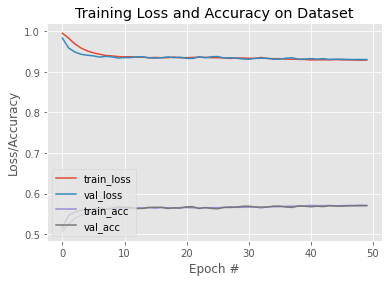

done with plot
57.24% (+/- 0.15%)


In [161]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.regularizers import l2

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

from tensorflow.keras.regularizers import l2

cvscores = []
for train, test in kfold.split(X_train, y_train_0):
    # create model
    num = float(num)
    num = num + 0.1
    num = str(num)
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[19]),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dropout(.3),
        keras.layers.experimental.RandomFourierFeatures(output_dim=20, kernel_initializer='gaussian'),
        keras.layers.Dense(1, activation="sigmoid")
        ])
    
    # Compile model
    model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
   
    # Callbacks
    NAME = "Survivability-200-150-100-D-BN-He-{0}-{1}".format(time.time(), num)
    tensorboard = TensorBoard(log_dir="{0}\\logs\\{1}".format(path, NAME))
    
    onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.001)

    checkpoint = ModelCheckpoint(path+folder+'best_try_'+num+'_1.h5', monitor="val_loss", save_best_only=True, verbose=1)
    callbacks = [checkpoint, onecycle, tensorboard]
    
    # Fit the model
    history = model.fit(X_train, y_train_0, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_test, y_test_0), callbacks = callbacks)
    # evaluate the model
    scores = model.evaluate(X_test, y_test_0, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    savepickle(path, folder, 'history_'+num+'_1', history)
    plotdata(path, folder, 'plot_'+num+'_1', history)
    model.save_weights(path+folder+'try_'+num+'_1.h5')
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

## Neural Network Diagrams

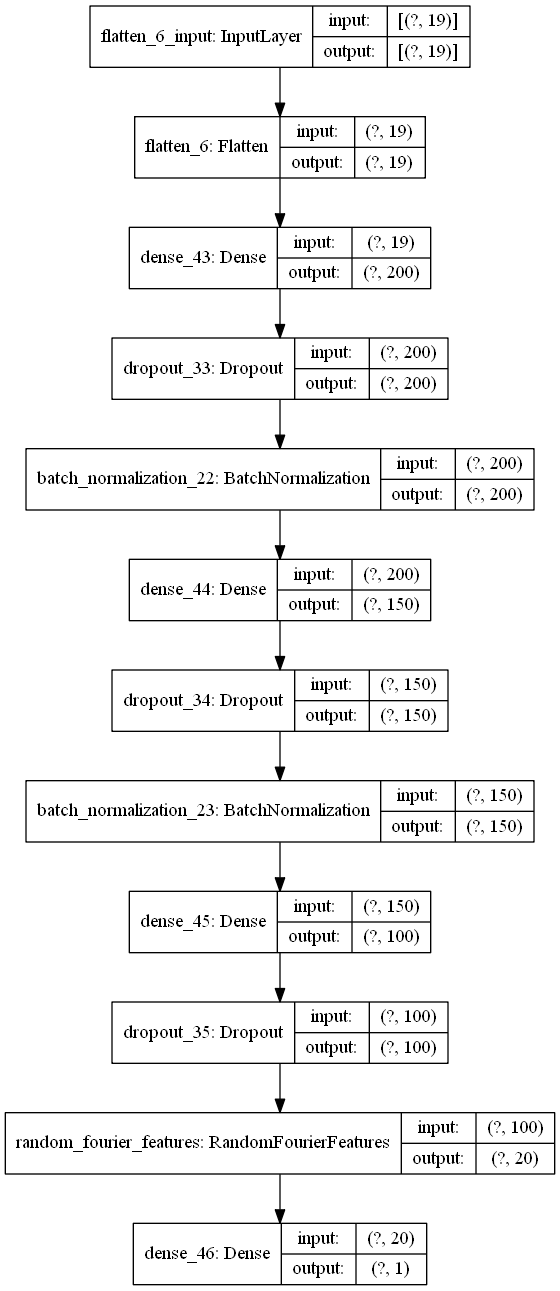

In [13]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.regularizers import l2

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[19]),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(.3),
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(.3),
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(.3),
 keras.layers.experimental.RandomFourierFeatures(output_dim=20, kernel_initializer='gaussian'),
    keras.layers.Dense(1, activation="sigmoid")
    ])


plot_model(model, to_file='model_plot_rbf_svm.png', show_shapes=True, show_layer_names=True)